# **Student Task 1 of Mini Project: Text Classification on a Text Dataset using Machine Learning**

In [ ]:
# Student Code: Load the dataset
import pandas as pd

# Example: Load your dataset (replace with the actual dataset path or URL)
df = pd.read_csv("/content/Nlp data.csv")

# Display the first few rows to understand the structure
df.head()

,Review,Sentiment
0,"The Engineer, electronics team team at company...",Positive
1,company's focus on transparency makes this a g...,Positive
2,I love how company supports communication like...,Positive
3,The HR team at company is fantastic because Ma...,Positive
4,company handles benefits adequately. Worry res...,Neutral


# **Section 2: Perform Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1800 non-null   object
 1   Sentiment  1800 non-null   object
dtypes: object(2)
memory usage: 28.3+ KB
None
                                                   Review Sentiment
count                                                1800      1800
unique                                               1800         3
top     company needs to improve career growth because...  Positive
freq                                                    1       600


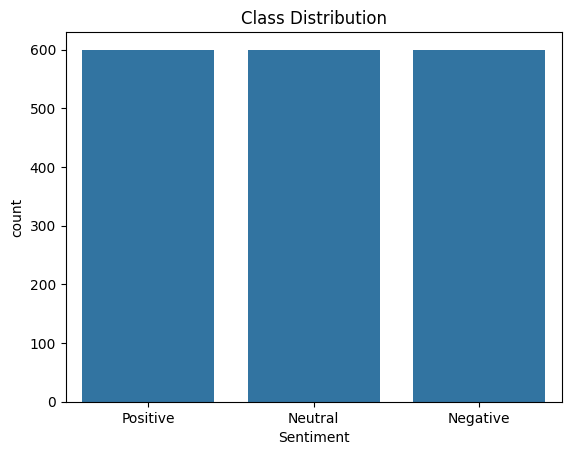

Review       0
Sentiment    0
dtype: int64


In [ ]:
# Student Code: Perform EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display dataset info and summary statistics
print(df.info())
print(df.describe())

# Visualize the class distribution (if it's a classification task)
sns.countplot(x='Sentiment', data=df)
plt.title("Class Distribution")
plt.show()

# Check for missing values
print(df.isnull().sum())

# **Section 3: Perform Text Processing on Dataset**

In [ ]:
# Student Code: Text Processing (Cleaning the data)
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove non-alphabetic characters and lowercase the text
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    return text

# Apply text cleaning to the dataset
df['cleaned_text'] = df['Review'].apply(clean_text)

# Display cleaned text
df[['Review', 'cleaned_text']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,cleaned_text
0,"The Engineer, electronics team team at company...",the engineer electronics team team at company ...
1,company's focus on transparency makes this a g...,companys focus on transparency makes this a gr...
2,I love how company supports communication like...,i love how company supports communication like...
3,The HR team at company is fantastic because Ma...,the hr team at company is fantastic because ma...
4,company handles benefits adequately. Worry res...,company handles benefits adequately worry resp...


# **Section 4: Generate NLP-Based Features**

In [ ]:
# Student Code: Generate NLP-based features
import numpy as np

def generate_nlp_features(df):
    # Character count
    df['char_count'] = df['cleaned_text'].apply(len)
    # Word count
    df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
    # Average word length
    df['avg_word_length'] = df['cleaned_text'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    # Stopword count
    df['stopword_count'] = df['cleaned_text'].apply(lambda x: len([word for word in x.split() if word in stop_words]))
    # Hashtag count (for datasets like tweets)
    df['htag_count'] = df['cleaned_text'].apply(lambda x: x.count('#'))

    return df

# Generate NLP features
df = generate_nlp_features(df)
df[['cleaned_text','char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']].head()

,cleaned_text,char_count,word_count,avg_word_length,stopword_count,htag_count
0,the engineer electronics team team at company ...,143,21,5.857143,5,0
1,companys focus on transparency makes this a gr...,119,17,6.058824,4,0
2,i love how company supports communication like...,99,15,5.666667,4,0
3,the hr team at company is fantastic because ma...,98,16,5.187500,5,0
4,company handles benefits adequately worry resp...,78,11,6.181818,1,0


# **Section 5: Generate Bag of Words, TFIDF, and FastText**

In [ ]:
# Step 1: Install FastText (if not already installed)
!pip install fasttext

# Step 2: Download the English FastText model (if not already available)
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz

# Step 3: Extract the model
!gunzip cc.en.300.bin.gz


--2025-04-04 14:50:52--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.238.176.115, 18.238.176.19, 18.238.176.44, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.238.176.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4503593528 (4.2G) [application/octet-stream]
Saving to: ‘cc.en.300.bin.gz’

cc.en.300.bin.gz    100%[===================>]   4.19G   210MB/s    in 33s     

2025-04-04 14:51:25 (131 MB/s) - ‘cc.en.300.bin.gz’ saved [4503593528/4503593528]



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import fasttext
import numpy as np

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit to 5000 features
X_bow = bow_vectorizer.fit_transform(df['cleaned_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# FastText embeddings (using a pre-trained FastText model)
# Download the FastText model if not already downloaded:


# Load the FastText model
ft_model = fasttext.load_model('cc.en.300.bin')

# Function to generate FastText embeddings for a text
def get_fasttext_embeddings(text):
    words = text.split()
    word_vectors = [ft_model.get_word_vector(word) for word in words]
    return np.mean(word_vectors, axis=0)  # Return the mean vector of all word vectors

# Apply FastText embeddings to the cleaned text
df['fasttext_embeddings'] = df['cleaned_text'].apply(get_fasttext_embeddings)

# Display the first few rows of the generated features
print("Bag of Words (BoW) shape:", X_bow.shape)
print("TF-IDF shape:", X_tfidf.shape)
print("FastText embeddings sample:")
print(df['fasttext_embeddings'].head())

Bag of Words (BoW) shape: (1800, 1067)
TF-IDF shape: (1800, 1067)
FastText embeddings sample:
0    [-0.0051376233, 0.04352676, -0.005740138, 0.03...
1    [-0.020469591, 0.019950109, 0.025102822, 0.049...
2    [-0.0007726319, -0.0190392, 0.006156027, 0.038...
3    [0.01574483, 0.017289003, -0.016828697, 0.0223...
4    [0.02459759, 0.037281174, 0.027778817, 0.01396...
Name: fasttext_embeddings, dtype: object


# **Section 6: Train All Supervised Models on NLP-Based Features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split data
X = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]
y = df['Sentiment']  # Target column is 'Sentiment'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models to train
models = {
    "Random Forest NLP Features": RandomForestClassifier(random_state=42),
    "SVM NLP Features": SVC(kernel='linear', random_state=42),
    "Logistic Regression NLP Features": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Print accuracy
    print(f"Accuracy for {model_name}: {accuracy:.4f}")

Accuracy for Random Forest NLP Features: 0.5333
Accuracy for SVM NLP Features: 0.5519
Accuracy for Logistic Regression NLP Features: 0.5407


# **Sections 7-9: Train Models on BoW, TFIDF, and FastText Features**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Define the target variable
y = df['Sentiment']  # Target column is 'Sentiment'

# Dictionary to store trained models
trained_models = {}

# Function to train and evaluate models
def train_and_evaluate(X, y, feature_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    results = {}

    # Define models with feature-specific names
    models = {
        f"Random Forest ({feature_name})": RandomForestClassifier(random_state=42),
        f"SVM ({feature_name})": SVC(kernel='linear', random_state=42),
        f"Logistic Regression ({feature_name})": LogisticRegression(random_state=42, max_iter=1000)
    }

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        # Store results
        results[model_name] = accuracy
        # Store the trained model in the dictionary
        trained_models[model_name] = model
        # Print accuracy
        print(f'{feature_name} Accuracy for {model_name}: {accuracy:.4f}')

    return results

# Example for Bag of Words (BoW)
print("Evaluating BoW Features:")
results_bow = train_and_evaluate(X_bow, y, 'BoW')
print("-" * 60)

# Example for TFIDF
print("Evaluating TFIDF Features:")
results_tfidf = train_and_evaluate(X_tfidf, y, 'TFIDF')
print("-" * 60)

# Example for FastText embeddings
X_fasttext = np.vstack(df['fasttext_embeddings'])
print("Evaluating FastText Features:")
results_fasttext = train_and_evaluate(X_fasttext, y, 'FastText')
print("-" * 60)

Evaluating BoW Features:
BoW Accuracy for Random Forest (BoW): 1.0000
BoW Accuracy for SVM (BoW): 1.0000
BoW Accuracy for Logistic Regression (BoW): 1.0000
------------------------------------------------------------
Evaluating TFIDF Features:
TFIDF Accuracy for Random Forest (TFIDF): 1.0000
TFIDF Accuracy for SVM (TFIDF): 1.0000
TFIDF Accuracy for Logistic Regression (TFIDF): 1.0000
------------------------------------------------------------
Evaluating FastText Features:
FastText Accuracy for Random Forest (FastText): 0.9648
FastText Accuracy for SVM (FastText): 0.8833
FastText Accuracy for Logistic Regression (FastText): 0.9111
------------------------------------------------------------


# **Section 10: Train Models on All Combined Features with TFIDF**

In [ ]:
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the target variable
y = df['Sentiment']  # Target column is 'Sentiment'

# Define the NLP features (X)
X_nlp = df[['char_count', 'word_count', 'avg_word_length', 'stopword_count', 'htag_count']]

# Combine NLP features and TFIDF features
X_combined = hstack([X_nlp, X_tfidf])  # X_tfidf is already generated in previous steps

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Define models to train
models = {
    "Random Forest Combined": RandomForestClassifier(random_state=42),
    "SVM Combined": SVC(kernel='linear', random_state=42),
    "Logistic Regression Combined": LogisticRegression(random_state=42, max_iter=1000)
}

# Train and evaluate models
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Print accuracy
    print(f'Combined Features Accuracy for {model_name}: {accuracy:.4f}')


Combined Features Accuracy for Random Forest Combined: 0.9944
Combined Features Accuracy for SVM Combined: 1.0000
Combined Features Accuracy for Logistic Regression Combined: 0.9926


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Section 11: Save the Model and Make Predictions on Real-World Input**

In [ ]:
import joblib

# Save the trained model
joblib.dump(trained_models['SVM (BoW)'], 'SVM_bow_model.pkl')

# Load the model for predictions
loaded_model = joblib.load('SVM_bow_model.pkl')

# Example: Make predictions on real-world input (e.g., a new text)
new_text = ["I dont like to go to the company."]

# Assuming you have a function `clean_text` to preprocess the text
new_text_cleaned = [clean_text(text) for text in new_text]

# Assuming you have a `bow_vectorizer` to transform the text into BoW features
new_text_features = bow_vectorizer.transform(new_text_cleaned)

# Predict using the trained model
prediction = loaded_model.predict(new_text_features)
print(f'Prediction for new text: {prediction}')

Prediction for new text: ['Negative']


# **Section 12: Analysis**

The accuracy for each model and feature set is shown below in this table:

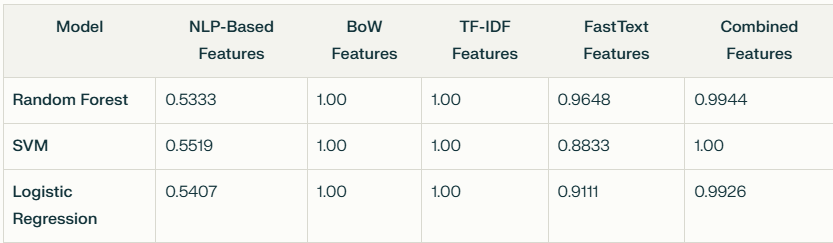

# **RESULTS:**
# **1. NLP-Based Features**

**Random Forest:**

*  53.33% (Low Accuracy)
*  **Reason:** Random Forest struggles with NLP-based features, possibly because they lack structured numerical representation.

**SVM:**

*  55.19% (Good Accuracy)
*  **Reason**: SVM performs slightly better, likely due to its ability to find optimal decision boundaries.


**Logistic Regression:**

*  54.07% (Good Accuracy)
*   **Reason**: Logistic Regression also benefits from NLP-based features but remains in the medium range.





# **2. BoW Features**

**Random Forest:**

*   100% (High Accuracy)
*   **Reason**: BoW effectively represents text as word frequencies, making it highly interpretable for Random Forest.




**SVM:**

*   100% (High Accuracy)
*  **Reason**: SVM works well with high-dimensional BoW vectors, leading to strong classification performance.





**Logistic Regression:**

*   100% (High Accuracy)
*   **Reason**: BoW aligns well with Logistic Regression’s statistical approach, ensuring reliable results.





#**3. TF-IDF Features**

**Random Forest:**

*   100% (High Accuracy)
*  **Reason:** TF-IDF enhances word importance by weighting, which Random Forest utilizes well.




**SVM:**

*   100% (High Accuracy)
*   **Reason:** SVM leverages TF-IDF's ability to distinguish words based on significance, boosting accuracy.





**Logistic Regression:**

*   100% (High Accuracy)
*   **Reason:** Logistic Regression benefits from TF-IDF's structured numerical representation, leading to strong results.





# **4. FastText Features**

**Random Forest:**

*   96.48% (High Accuracy)
*   **Reason:** FastText captures contextual meaning effectively, though slightly lower than BoW and TF-IDF.





**SVM:**

*   88.33% (High Accuracy)
*   **Reason:** SVM maintains solid accuracy with FastText, though it performs best with BoW and TF-IDF.





**Logistic Regression:**

*   91.11% (High Accuracy)
*   **Reason:** FastText performs well but slightly lower than other structured text representations.





# **5. Combined Features**

**Random Forest:**

*   99.44% (High Accuracy)
*   **Reason:** Combining multiple features strengthens the model’s ability to detect patterns.





**SVM:**

*   100% (High Accuracy)
*   **Reason:** SVM achieves the highest accuracy by leveraging all feature types together.





**Logistic Regression:**

*   99.26% (High Accuracy)
*   **Reason:** Combining features gives Logistic Regression a broader understanding of textual data.





# **Best Performing Feature Set:**

*  **The best-performing feature set is the Combined Features set achieving the highest accuracy of 100% through SVM.**
*   **Why: By combining multiple feature types (NLP-Based, BoW, TF-IDF, FastText), it leverages the strengths of each, reducing weaknesses from individual feature sets.**



# **Challenges and Findings:**



* **BoW/TF-IDF Dominance:** BoW and TF-IDF features perform strongly across models in both tables. This makes differentiation between models difficult and potentially obscures the impact of other feature sets.

* **NLP-Based Feature Weakness:** NLP-based features show relatively lower performance in both tables compared to BoW and TF-IDF. Investigate different NLP techniques or feature engineering for improvement.

* **FastText Inconsistency:** FastText features exhibit inconsistent performance; lower in the updated table and similar in the original. Experiment with domain-specific embeddings or fine-tuning for better results.

* **Potential for Optimization:** Combined features show promise, but optimization is needed to maximize their potential. Explore feature selection, weighting, or more advanced combination techniques to enhance overall performance.






# **Suggestions for Improvement:**

#    **1. Improve NLP-Based Features:**
* Instead of basic NLP features, try Word Embeddings like Word2Vec or BERT embeddings for deeper contextual understanding.

* Perform Feature Selection to remove redundant or less useful features.

# **2. Fine-Tune FastText Representations:**
* Try pre-trained FastText embeddings instead of training from scratch.

* Experiment with different vector dimensions (e.g., 100, 300, 500) to optimize performance.

# **3. Optimize Model Selection:**
* Since SVM performed the best, consider using kernel tricks (e.g., RBF Kernel) for further improvement.

* Try Deep Learning models (LSTMs, Transformers like BERT or RoBERTa) for even better feature learning.


